In [55]:
#1.Import the dataset and explore basic info (nulls, data types)
import pandas as pd
# Load the dataset(Heart UCI Dataset)
url = "https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv"
df = pd.read_csv(url)

In [56]:
# display 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
print("Dataset Info: ")
df.info()

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [58]:
print("Missing Values: ")
df.isnull().sum()

Missing Values: 


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [59]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 1


In [60]:
# Drop Duplicates rows(if any)
df.drop_duplicates(inplace=True)

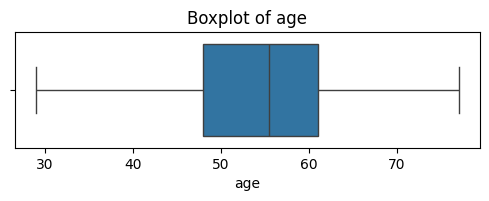

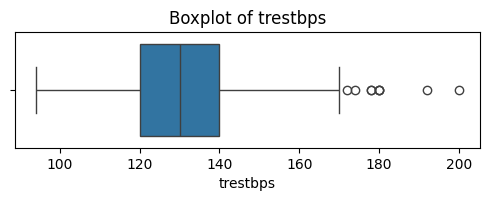

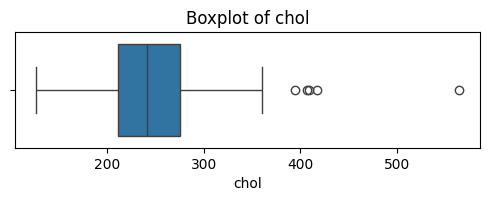

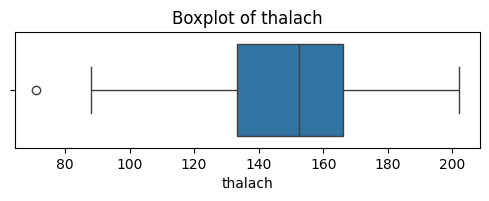

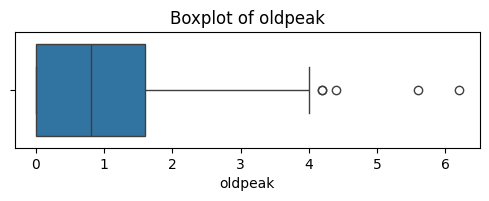

In [61]:
# 5. Visualize outliers using boxplots and remove them
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for all numeric features
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [62]:
# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Apply outlier removal to numeric columns
for col in numeric_cols:
    df = remove_outliers(df, col)

print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (283, 14)


In [63]:
# Seprate features (X) and target (Y)
X=df.drop('target',axis=1)
Y=df['target']

In [64]:
# Train-test Split(80% train, 20% test)
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
# Define numeric and categoric columns
# a. numerical for scaling
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# b. categorical for one-hot encoding
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [66]:
#create preprocessing pipelines
# 2.Handle missing values using mean/median/imputation(SimpleImputer(strategy='mean') and 'most_frequent')
#3.Convert categorical features into numerical using encoding(	Used OneHotEncoder() inside Pipeline)
#4.	Normalize/standardize the numerical features(	Used StandardScaler())
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
#a.Pipeline for numeric features: impute missing with mean, then scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
#b.Pipeline for categorical features: impute missing with most frequent, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [67]:
# Combine the numeric and categorical pipelines
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [68]:
#fit the preprocessor on training data and transfprm both train and test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [69]:
#check shapes
print(X_train_preprocessed.shape)
print(X_test_preprocessed.shape)

(226, 29)
(57, 29)
